In [2]:
import pandas as pd

In [14]:
ratings=pd.read_table('D:\PrograminD/ratings.dat',sep='::',names=['UserID','MovieID','Rating','Timestamp'],engine='python')

In [13]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [16]:
users=pd.read_table('D:\PrograminD/users.dat',sep='::',names=['UserID','Gender','Age','Occupation','Zip-code'],engine='python')

In [22]:
movies=pd.read_table('D:\PrograminD/movies.dat',sep='::',names=['MovieID','Title','Genres'],engine='python')

In [25]:
users.head(3)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


In [27]:
movies.head(3)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [37]:
movies.Title =movies.Title.str[:-7]

In [39]:
movies.head(3)

,MovieID,Title,Genres
0,1,Toy Story,Animation|Children's|Comedy
1,2,Jumanji,Adventure|Children's|Fantasy
2,3,Grumpier Old Men,Comedy|Romance


In [42]:
users_ratings=users.merge(ratings,how='inner',on='UserID')

In [44]:
users_ratings.head(3)

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968


In [46]:
mlens=users_ratings.merge(movies,how='inner',on='MovieID')

In [61]:
mlens.head(5)

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,2001,One Flew Over the Cuckoo's Nest,Drama
1,2,M,56,16,70072,1193,5,2001,One Flew Over the Cuckoo's Nest,Drama
2,12,M,25,12,32793,1193,4,2000,One Flew Over the Cuckoo's Nest,Drama
3,15,M,25,7,22903,1193,4,2000,One Flew Over the Cuckoo's Nest,Drama
4,17,M,50,1,95350,1193,5,2000,One Flew Over the Cuckoo's Nest,Drama


In [63]:
mlens['Genres'].value_counts()

Comedy                                           116883
Drama                                            111423
Comedy|Romance                                    42712
Comedy|Drama                                      42245
Drama|Romance                                     29170
Action|Thriller                                   26759
Horror                                            22563
Drama|Thriller                                    18248
Thriller                                          17851
Action|Adventure|Sci-Fi                           17783
Drama|War                                         14656
Action|Sci-Fi                                     14309
Action|Sci-Fi|Thriller                            13970
Action                                            12311
Action|Drama|War                                  12224
Crime|Drama                                       11870
Comedy|Drama|Romance                              11069
Action|Adventure                                

In [65]:
mlens['Genres'].unique()

array(['Drama', "Animation|Children's|Musical", 'Musical|Romance',
       "Animation|Children's|Comedy", 'Action|Adventure|Comedy|Romance',
       'Action|Adventure|Drama', 'Comedy|Drama',
       "Adventure|Children's|Drama|Musical", 'Musical', 'Comedy',
       "Animation|Children's", 'Comedy|Fantasy', 'Animation',
       'Comedy|Sci-Fi', 'Drama|War', 'Romance',
       "Animation|Children's|Musical|Romance",
       "Children's|Drama|Fantasy|Sci-Fi", 'Drama|Romance',
       'Animation|Comedy|Thriller',
       "Adventure|Animation|Children's|Comedy|Musical",
       "Animation|Children's|Comedy|Musical", 'Thriller',
       'Action|Crime|Romance', 'Action|Adventure|Fantasy|Sci-Fi',
       "Children's|Comedy|Musical", 'Action|Drama|War',
       "Children's|Drama", 'Crime|Drama|Thriller', 'Action|Crime|Drama',
       'Action|Adventure|Mystery', 'Crime|Drama',
       'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Romance|Sci-Fi|War', 'Action|Thriller',
       'Action|Drama', 'Co

In [68]:
mlens['Genres'].nunique()

301

In [71]:
import numpy as np

In [73]:
g= np.unique(mlens['Genres'])
g

array(['Action', 'Action|Adventure', 'Action|Adventure|Animation',
       "Action|Adventure|Animation|Children's|Fantasy",
       'Action|Adventure|Animation|Horror|Sci-Fi',
       "Action|Adventure|Children's",
       "Action|Adventure|Children's|Comedy",
       "Action|Adventure|Children's|Fantasy",
       "Action|Adventure|Children's|Sci-Fi", 'Action|Adventure|Comedy',
       'Action|Adventure|Comedy|Crime', 'Action|Adventure|Comedy|Horror',
       'Action|Adventure|Comedy|Horror|Sci-Fi',
       'Action|Adventure|Comedy|Romance',
       'Action|Adventure|Comedy|Sci-Fi', 'Action|Adventure|Comedy|War',
       'Action|Adventure|Crime', 'Action|Adventure|Crime|Drama',
       'Action|Adventure|Crime|Thriller', 'Action|Adventure|Drama',
       'Action|Adventure|Drama|Romance',
       'Action|Adventure|Drama|Sci-Fi|War',
       'Action|Adventure|Drama|Thriller', 'Action|Adventure|Fantasy',
       'Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Horror',
       'Action|Adventure|Horror|

In [75]:
from sklearn.preprocessing import LabelEncoder 

In [77]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(mlens['Genres'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

{0: 'Action',
 1: 'Action|Adventure',
 2: 'Action|Adventure|Animation',
 3: "Action|Adventure|Animation|Children's|Fantasy",
 4: 'Action|Adventure|Animation|Horror|Sci-Fi',
 5: "Action|Adventure|Children's",
 6: "Action|Adventure|Children's|Comedy",
 7: "Action|Adventure|Children's|Fantasy",
 8: "Action|Adventure|Children's|Sci-Fi",
 9: 'Action|Adventure|Comedy',
 10: 'Action|Adventure|Comedy|Crime',
 11: 'Action|Adventure|Comedy|Horror',
 12: 'Action|Adventure|Comedy|Horror|Sci-Fi',
 13: 'Action|Adventure|Comedy|Romance',
 14: 'Action|Adventure|Comedy|Sci-Fi',
 15: 'Action|Adventure|Comedy|War',
 16: 'Action|Adventure|Crime',
 17: 'Action|Adventure|Crime|Drama',
 18: 'Action|Adventure|Crime|Thriller',
 19: 'Action|Adventure|Drama',
 20: 'Action|Adventure|Drama|Romance',
 21: 'Action|Adventure|Drama|Sci-Fi|War',
 22: 'Action|Adventure|Drama|Thriller',
 23: 'Action|Adventure|Fantasy',
 24: 'Action|Adventure|Fantasy|Sci-Fi',
 25: 'Action|Adventure|Horror',
 26: 'Action|Adventure|Horror|T

In [80]:
mlens['label']=genre_labels

In [82]:
mlens.head(3)

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres,label
0,1,F,1,10,48067,1193,5,2001,One Flew Over the Cuckoo's Nest,Drama,239
1,2,M,56,16,70072,1193,5,2001,One Flew Over the Cuckoo's Nest,Drama,239
2,12,M,25,12,32793,1193,4,2000,One Flew Over the Cuckoo's Nest,Drama,239


In [85]:
mlens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 11 columns):
UserID        1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null int64
Zip-code      1000209 non-null object
MovieID       1000209 non-null int64
Rating        1000209 non-null int64
Timestamp     1000209 non-null object
Title         1000209 non-null object
Genres        1000209 non-null object
label         1000209 non-null int64
dtypes: int64(6), object(5)
memory usage: 91.6+ MB


In [89]:
#minimum rating given to a movie
mlens['Rating'].min() 

1

In [91]:
mlens['Rating'].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

In [93]:
mlens['Rating'].max()

5

In [95]:
# checking the overall dataset
mlens.shape

(1000209, 11)

In [98]:
#checking isnull with dataframe
a=pd.DataFrame([1,2,3])
a.isnull()

,0
0,False
1,False
2,False


In [100]:
#checking non-null with boolean 
1+False

1

In [103]:
#checking for total null values
# axis = 0 for column wise analysis
print(mlens.isnull().sum(axis = 0))

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
label         0
dtype: int64


# 1. Age distribution of the users

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Age of the users')

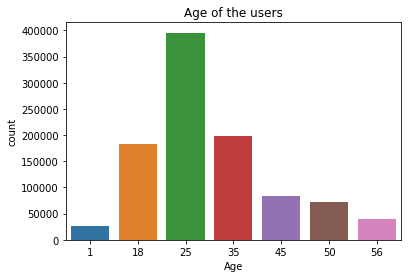

In [108]:
sns.countplot(x='Age',data=mlens).set_title('Age of the users')

# How many movies got the ratings from 1-5

Text(0.5,1,'Rating Frequencies of movies by users')

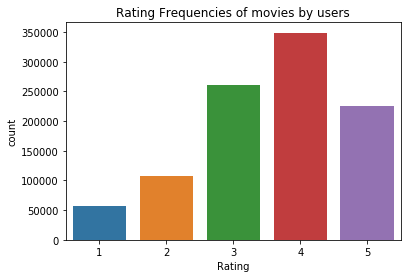

In [110]:
ax = sns.countplot(x='Rating', data=mlens)
ax.set_title('Rating Frequencies of movies by users')

# How the no of ratings per year were given

Text(0.5,1,'No of ratings per year')

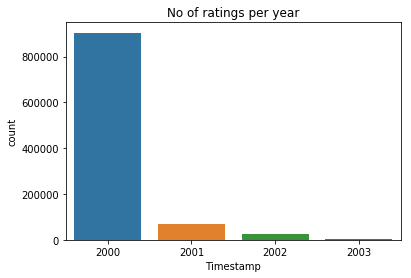

In [113]:
ax = sns.countplot(x='Timestamp', data=mlens)
ax.set_title('No of ratings per year')

In [115]:
# You can also have a tabular representation of the above graph as:
mlens['Timestamp'].value_counts()

2000    904175
2001     68628
2002     24053
2003      3353
Name: Timestamp, dtype: int64

In [118]:
# Looking at different genres
a=mlens['Genres'].value_counts()
type(a)

pandas.core.series.Series

In [120]:
# Looking at top 25 different genres
mlens['Genres'].value_counts()[:25]

Comedy                          116883
Drama                           111423
Comedy|Romance                   42712
Comedy|Drama                     42245
Drama|Romance                    29170
Action|Thriller                  26759
Horror                           22563
Drama|Thriller                   18248
Thriller                         17851
Action|Adventure|Sci-Fi          17783
Drama|War                        14656
Action|Sci-Fi                    14309
Action|Sci-Fi|Thriller           13970
Action                           12311
Action|Drama|War                 12224
Crime|Drama                      11870
Comedy|Drama|Romance             11069
Action|Adventure                 10446
Action|Drama                     10382
Comedy|Horror                     9681
Comedy|Sci-Fi                     9311
Children's|Comedy                 9077
Animation|Children's              8851
Horror|Thriller                   8649
Animation|Children's|Musical      8220
Name: Genres, dtype: int6

# Distributions of the movie-ratings across different genres

In [122]:
mlens[mlens['Genres']=='Comedy'].Rating

14386      4
14387      5
14388      5
14389      4
14390      4
14391      4
14392      3
14393      5
14394      5
14395      3
14396      5
14397      4
14398      4
14399      3
14400      4
14401      5
14402      4
14403      5
14404      5
14405      4
14406      4
14407      3
14408      3
14409      4
14410      5
14411      1
14412      5
14413      5
14414      5
14415      5
          ..
1000029    3
1000030    4
1000031    4
1000041    5
1000085    4
1000086    3
1000087    3
1000088    5
1000089    5
1000096    3
1000097    3
1000098    2
1000101    2
1000102    5
1000103    3
1000118    4
1000119    3
1000120    1
1000121    3
1000125    3
1000131    4
1000132    4
1000158    1
1000159    1
1000160    1
1000161    1
1000163    3
1000191    3
1000192    4
1000202    4
Name: Rating, Length: 116883, dtype: int64

C:\Users\yvadde\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


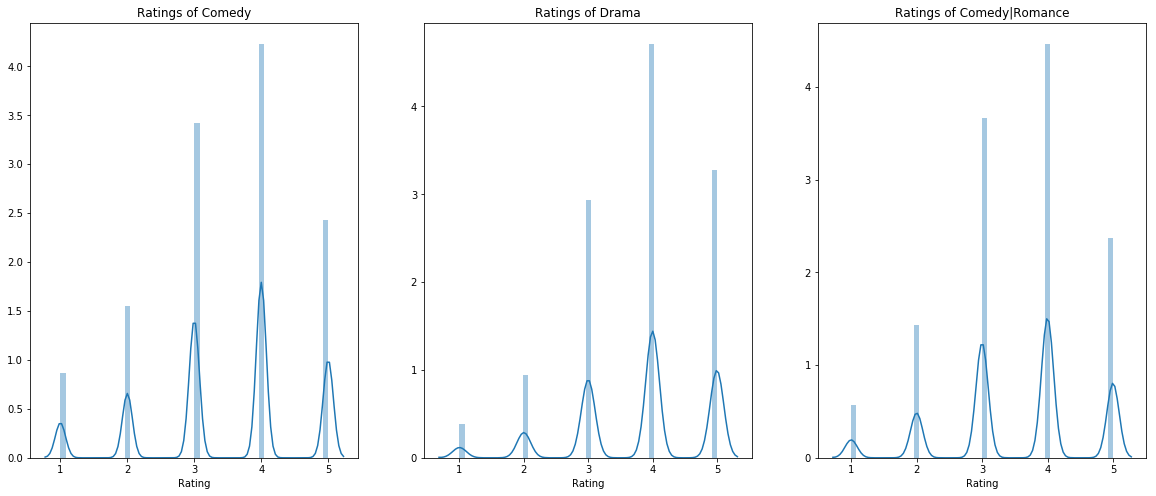

In [124]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(mlens[mlens['Genres']=='Comedy'].Rating,ax=ax[0])
ax[0].set_title('Ratings of Comedy')
sns.distplot(mlens[mlens['Genres']=='Comedy|Romance'].Rating,ax=ax[2])
ax[2].set_title('Ratings of Comedy|Romance')
sns.distplot(mlens[mlens['Genres']=='Drama'].Rating,ax=ax[1])
ax[1].set_title('Ratings of Drama')
plt.show()

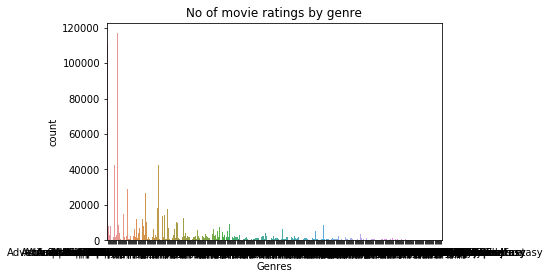

In [126]:
ax = sns.countplot(x='Genres', data=mlens)
ax.set_title('No of movie ratings by genre')
plt.show()

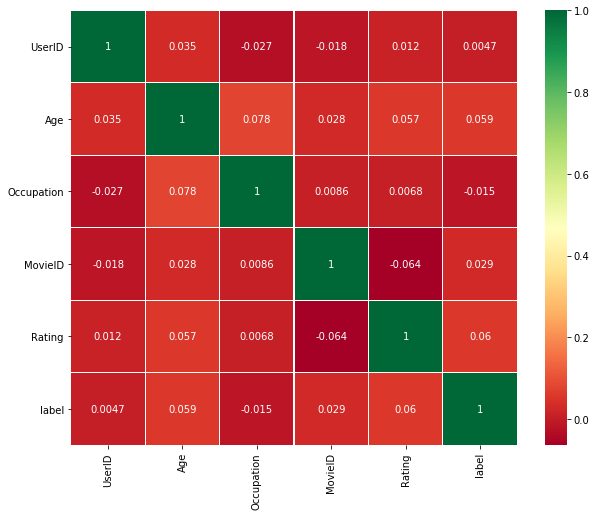

In [128]:
sns.heatmap(mlens.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)

C:\Users\yvadde\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\yvadde\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


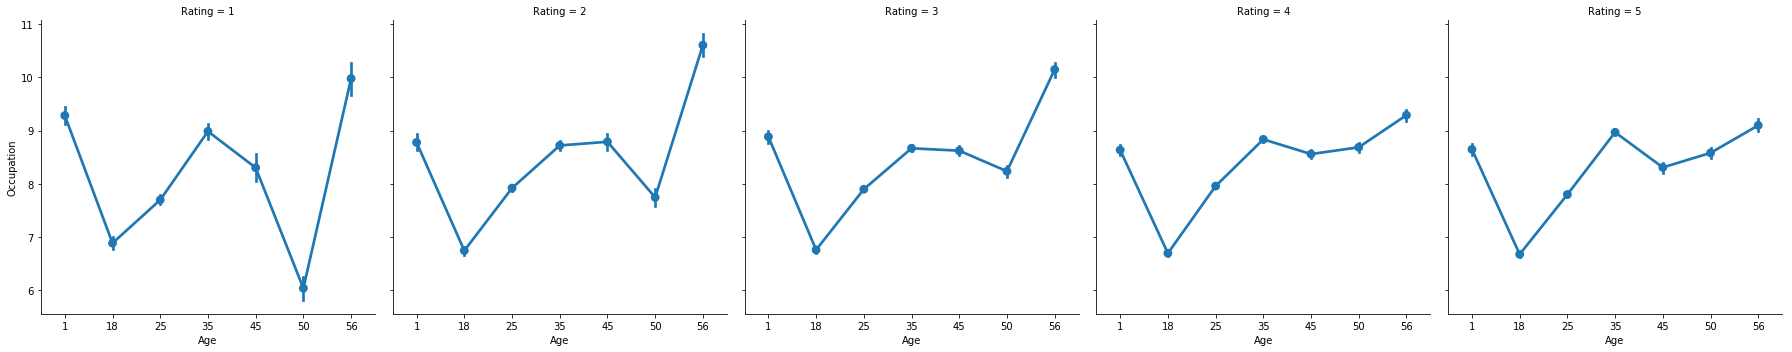

In [130]:
sns.factorplot('Age','Occupation',data=mlens,col='Rating')
plt.show()

# 2. Find and visualize the user rating of the movie “Toy Story”

In [132]:
mlens[mlens['Title']=='Toy Story']

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres,label
41626,1,F,1,10,48067,1,5,2001,Toy Story,Animation|Children's|Comedy,145
41627,6,F,50,9,55117,1,4,2000,Toy Story,Animation|Children's|Comedy,145
41628,8,M,25,12,11413,1,4,2000,Toy Story,Animation|Children's|Comedy,145
41629,9,M,25,17,61614,1,5,2000,Toy Story,Animation|Children's|Comedy,145
41630,10,F,35,1,95370,1,5,2000,Toy Story,Animation|Children's|Comedy,145
41631,18,F,18,3,95825,1,4,2000,Toy Story,Animation|Children's|Comedy,145
41632,19,M,1,10,48073,1,5,2001,Toy Story,Animation|Children's|Comedy,145
41633,21,M,18,16,99353,1,3,2000,Toy Story,Animation|Children's|Comedy,145
41634,23,M,35,0,90049,1,4,2001,Toy Story,Animation|Children's|Comedy,145
41635,26,M,25,7,23112,1,3,2000,Toy Story,Animation|Children's|Comedy,145


In [133]:
ts=mlens[mlens['Title']=='Toy Story']

In [135]:
ts.head(3)

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres,label
41626,1,F,1,10,48067,1,5,2001,Toy Story,Animation|Children's|Comedy,145
41627,6,F,50,9,55117,1,4,2000,Toy Story,Animation|Children's|Comedy,145
41628,8,M,25,12,11413,1,4,2000,Toy Story,Animation|Children's|Comedy,145


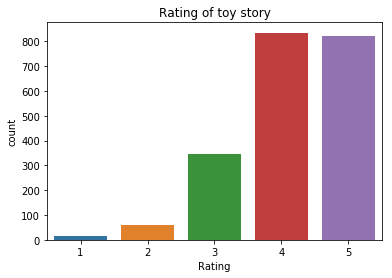

In [137]:
ax = sns.countplot(x='Rating', data=ts)
ax.set_title('Rating of toy story')
plt.show()

# Find and visualize the viewership of the movie “Toy Story” by age group

Text(0.5,1,'Viewership of toy story by age group')

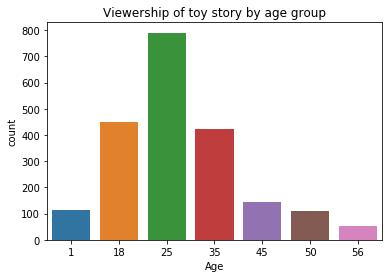

In [138]:
ax = sns.countplot(x='Age', data=ts)
ax.set_title('Viewership of toy story by age group')

# 3.Find and visualize the top 25 movies by viewership rating

In [140]:
top_25= mlens.groupby('Title').size().sort_values(ascending=False)[:25]

In [142]:
top_25

Title
American Beauty                                   3428
Star Wars: Episode IV - A New Hope                2991
Star Wars: Episode V - The Empire Strikes Back    2990
Star Wars: Episode VI - Return of the Jedi        2883
Jurassic Park                                     2672
Saving Private Ryan                               2653
Terminator 2: Judgment Day                        2649
Matrix, The                                       2590
Back to the Future                                2583
Silence of the Lambs, The                         2578
Men in Black                                      2538
Raiders of the Lost Ark                           2514
Fargo                                             2513
Sixth Sense, The                                  2459
Braveheart                                        2443
Shakespeare in Love                               2369
Princess Bride, The                               2318
Schindler's List                                  2304
L.A.

In [144]:
# We can also do like this:
mlens.Title.value_counts()[:25]

American Beauty                                   3428
Star Wars: Episode IV - A New Hope                2991
Star Wars: Episode V - The Empire Strikes Back    2990
Star Wars: Episode VI - Return of the Jedi        2883
Jurassic Park                                     2672
Saving Private Ryan                               2653
Terminator 2: Judgment Day                        2649
Matrix, The                                       2590
Back to the Future                                2583
Silence of the Lambs, The                         2578
Men in Black                                      2538
Raiders of the Lost Ark                           2514
Fargo                                             2513
Sixth Sense, The                                  2459
Braveheart                                        2443
Shakespeare in Love                               2369
Princess Bride, The                               2318
Schindler's List                                  2304
L.A. Confi

In [146]:
#displays high rated movies
high_rated= mlens['Rating']>4.0
mlens[high_rated].head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres,label
0,1,F,1,10,48067,1193,5,2001,One Flew Over the Cuckoo's Nest,Drama,239
1,2,M,56,16,70072,1193,5,2001,One Flew Over the Cuckoo's Nest,Drama,239
4,17,M,50,1,95350,1193,5,2000,One Flew Over the Cuckoo's Nest,Drama,239
6,19,M,1,10,48073,1193,5,2001,One Flew Over the Cuckoo's Nest,Drama,239
7,24,F,25,7,10023,1193,5,2000,One Flew Over the Cuckoo's Nest,Drama,239


# 4.Find the rating for a particular user of user id = 2696

In [148]:
mlens[mlens['UserID']==2696]

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres,label
24345,2696,M,25,7,24210,1270,2,2000,Back to the Future,Comedy|Sci-Fi,211
29848,2696,M,25,7,24210,1097,3,2000,E.T. the Extra-Terrestrial,Children's|Drama|Fantasy|Sci-Fi,169
244232,2696,M,25,7,24210,1617,4,2000,L.A. Confidential,Crime|Film-Noir|Mystery|Thriller,228
250014,2696,M,25,7,24210,800,5,2000,Lone Star,Drama|Mystery,248
273633,2696,M,25,7,24210,3386,1,2000,JFK,Drama|Mystery,248
277808,2696,M,25,7,24210,3176,4,2000,"Talented Mr. Ripley, The",Drama|Mystery|Thriller,251
371178,2696,M,25,7,24210,1711,4,2000,Midnight in the Garden of Good and Evil,Comedy|Crime|Drama|Mystery,179
377250,2696,M,25,7,24210,1589,3,2000,Cop Land,Crime|Drama|Mystery,220
598042,2696,M,25,7,24210,1783,4,2000,Palmetto,Film-Noir|Mystery|Thriller,269
603189,2696,M,25,7,24210,1892,4,2000,"Perfect Murder, A",Mystery|Thriller,289


In [151]:
us_2696=mlens[mlens['UserID']==2696]
us_2696

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres,label
24345,2696,M,25,7,24210,1270,2,2000,Back to the Future,Comedy|Sci-Fi,211
29848,2696,M,25,7,24210,1097,3,2000,E.T. the Extra-Terrestrial,Children's|Drama|Fantasy|Sci-Fi,169
244232,2696,M,25,7,24210,1617,4,2000,L.A. Confidential,Crime|Film-Noir|Mystery|Thriller,228
250014,2696,M,25,7,24210,800,5,2000,Lone Star,Drama|Mystery,248
273633,2696,M,25,7,24210,3386,1,2000,JFK,Drama|Mystery,248
277808,2696,M,25,7,24210,3176,4,2000,"Talented Mr. Ripley, The",Drama|Mystery|Thriller,251
371178,2696,M,25,7,24210,1711,4,2000,Midnight in the Garden of Good and Evil,Comedy|Crime|Drama|Mystery,179
377250,2696,M,25,7,24210,1589,3,2000,Cop Land,Crime|Drama|Mystery,220
598042,2696,M,25,7,24210,1783,4,2000,Palmetto,Film-Noir|Mystery|Thriller,269
603189,2696,M,25,7,24210,1892,4,2000,"Perfect Murder, A",Mystery|Thriller,289


Text(0.5,1,'Ratings of user 2696')

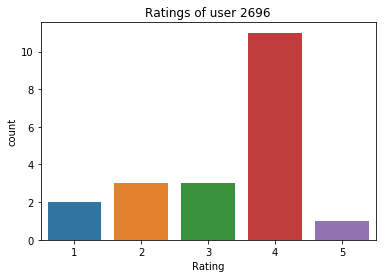

In [152]:
ax = sns.countplot(x='Rating', data=us_2696)
ax.set_title('Ratings of user 2696')